# Beginner Tutorials - 1. ML basics
1. Overview
- Classify images
- Classify text
- Classify structured data
- Regression
- Overfitting and Underfitting
- Save and Restore Models

# 3. Classify text
https://www.tensorflow.org/alpha/tutorials/keras/basic_text_classification

- IMDB 데이터셋 다운로드
- 데이터 탐색
 - 정수를 단어로 다시 변환하기
- 데이터 준비
- 모델 구성
 - 은닉 유닛
 - 손실 함수와 옵티마이저
- 검증 세트 만들기
- 모델 훈련
- 모델 평가
- 정확도와 손실 그래프 그리기

인터넷 영화 데이터베이스(Internet Movie DataBase:IMDB)<br>
25000 훈련, 25000 테스트용<br>
Review : Positive vs Negative : 이진 분류 문제<br>

tf.keras를 사용한 고급 텍스트 분류 튜토리얼 : MLCC 텍스트 분류 가이드 <br>
https://developers.google.com/machine-learning/guides/text-classification/

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
import numpy as np

print(tf.__version__)

2.0.0-alpha0


In [2]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

매개변수 num_words=10000은 훈련 데이터에서 가장 많이 등장하는 상위 10,000개의 단어를 선택합니다. <br>
데이터 크기를 적당하게 유지하기 위해 드물에 등장하는 단어는 제외하겠습니다.

### 데이터 탐색
- 정수를 단어로 다시 변환하기

In [3]:
print('훈련 샘플:{}, 레이블 샘플:{}'.format(len(train_data), len(train_labels)))

훈련 샘플:25000, 레이블 샘플:25000


In [4]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [6]:
word_index = imdb.get_word_index()

<font color='blue'><b>word_index </b></font>= 
{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 etc...}

<font color='blue'><b>word_index.items()</b></font> = dict_items([('fawn', 34701), ('tsukino', 52006), ('nunnery', 52007), ('sonja', 16816), ('vani', 63951), ('woods', 1408), ('spiders', 16115), ('hanging', 2345), ('woody', 2289), ('trawling', 52008), ("hold's", 52009), ('comically', 11307), ('localized', 40830), ('disobeying', 30568), ("'royale", 52010), ("harpo's", 40831), ('canet', 52011), ('aileen', 19313), ('acurately', 52012), ("diplomat's", 52013), ('rickman', 25242), ('arranged', 6746), ('rumbustious', 52014), etc...]

In [7]:
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"]=0
word_index["START"]=1
word_index["<UNK>"]=2 #unknown
word_index["UNUSED"]=3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) #value 숫자 key 단어

def decode_review(text):
    return ' '.join([reverse_word_index.get(i,'?') for i in text])

<font color='blue'><b>reverse_word_index </b></font>= {34704: 'fawn',
 52009: 'tsukino',
 52010: 'nunnery',
 16819: 'sonja',
 63954: 'vani',
 1411: 'woods',
 16118: 'spiders',
 2348: 'hanging',
 2292: 'woody',
 52011: 'trawling',
 52012: "hold's",
 11310: 'comically',
 40833: 'localized',
 30571: 'disobeying',etc ... }

## dict.get(key, default = None) 
### Parameters
key − This is the Key to be searched in the dictionary.

default − This is the Value to be returned in case key does not exist.

In [8]:
decode_review(train_data[0])

"START this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what

### 데이터 준비 
- 원-핫 인코딩(one-hot encoding)
- 임베딩(embedding) 

In [9]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                       value=word_index['<PAD>'],
                                                       padding='post',
                                                      maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [10]:
len(train_data[0]), len(train_data[1]) # 원래 값 (218, 189)

(256, 256)

In [11]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

### 모델 구성

In [12]:
vocab_size=10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16, input_shape=(None,))) # (batch, sequence, embedding)
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])

### 검증 세트 만들기

In [14]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

### 모델 훈련

In [15]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=40,
                   batch_size=512,
                   validation_data=(x_val, y_val),
                   verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 65us/sample - loss: 0.6922 - acc: 0.5889 - val_loss: 0.6906 - val_acc: 0.6781
Epoch 2/40
15000/15000 [==============================] - 1s 51us/sample - loss: 0.6874 - acc: 0.7207 - val_loss: 0.6837 - val_acc: 0.7096
Epoch 3/40
15000/15000 [==============================] - 1s 51us/sample - loss: 0.6759 - acc: 0.7448 - val_loss: 0.6686 - val_acc: 0.7528
Epoch 4/40
15000/15000 [==============================] - 1s 51us/sample - loss: 0.6548 - acc: 0.7595 - val_loss: 0.6441 - val_acc: 0.7539
Epoch 5/40
15000/15000 [==============================] - 1s 50us/sample - loss: 0.6229 - acc: 0.7896 - val_loss: 0.6103 - val_acc: 0.7803
Epoch 6/40
15000/15000 [==============================] - 1s 53us/sample - loss: 0.5817 - acc: 0.8090 - val_loss: 0.5701 - val_acc: 0.7987
Epoch 7/40
15000/15000 [==============================] - 1s 51us/sample - loss: 0.5348 - acc: 0.8249 - val_loss: 0.

### 모델 평가

In [16]:
results=model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 0s 17us/sample - loss: 0.3279 - acc: 0.8724
[0.32791716671943666, 0.87236]


### 정확도와 손실 그래프 그리기

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

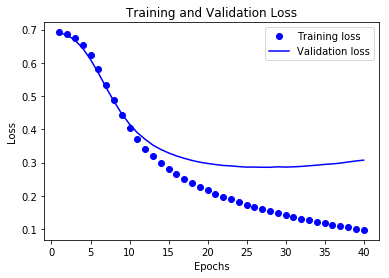

In [20]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

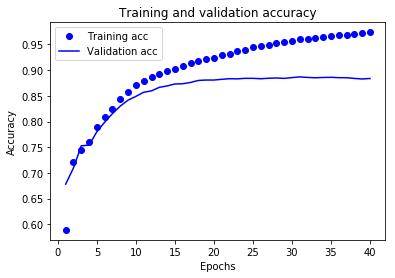

In [19]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()